In [1]:
#%pip install imbalanced-learn

In [5]:
import pandas as pd  # Pour la manipulation et l'analyse de données
import matplotlib.pyplot as plt  # Pour créer des visualisations
import seaborn as sns  # Pour des visualisations statistiques
import numpy as np  # Pour les opérations numériques
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler  # Pour standardiser les caractéristiques numériques
from sklearn.pipeline import Pipeline  # Pour créer une séquence d'étapes de prétraitement des données
from sklearn.preprocessing import StandardScaler  # Pour standardiser les caractéristiques numériques
from sklearn.impute import SimpleImputer  # Pour gérer les valeurs manquantes
from sklearn.compose import ColumnTransformer  # Pour appliquer différentes transformations à différentes colonnes
from imblearn.over_sampling import SMOTE  # Pour suréchantillonner la classe minoritaire

import mlflow  # Pour suivre et gérer les expériences d'apprentissage automatique
import mlflow.sklearn  # Pour enregistrer les modèles scikit-learn dans MLflow
from sklearn.ensemble import RandomForestClassifier  # Pour construire un modèle de forêt aléatoire
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score  # Pour évaluer les performances du modèle
from sklearn.linear_model import LogisticRegression  # Pour construire un modèle de régression logistique

In [7]:

data = pd.read_csv('Loan_Data.csv')
X_data = data.drop(columns=['default'])  # Toutes les colonnes sauf 'default'
y_data = data['default']  # La colonne 'default' est la variable cible


In [8]:
data.head() #Affichage du dataframe



,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [9]:
data.info()  #Informations du dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [3]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


Notre dataframe ne comporte aucune valeur manquante

In [10]:
# Obtenir les statistiques descriptives
data.describe()


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [11]:

# Distribution de la variable cible (default)
print(data['default'].value_counts())

default
0    8149
1    1851
Name: count, dtype: int64


# Visualisation des données


## Créer un histogramme pour chaque variable numérique


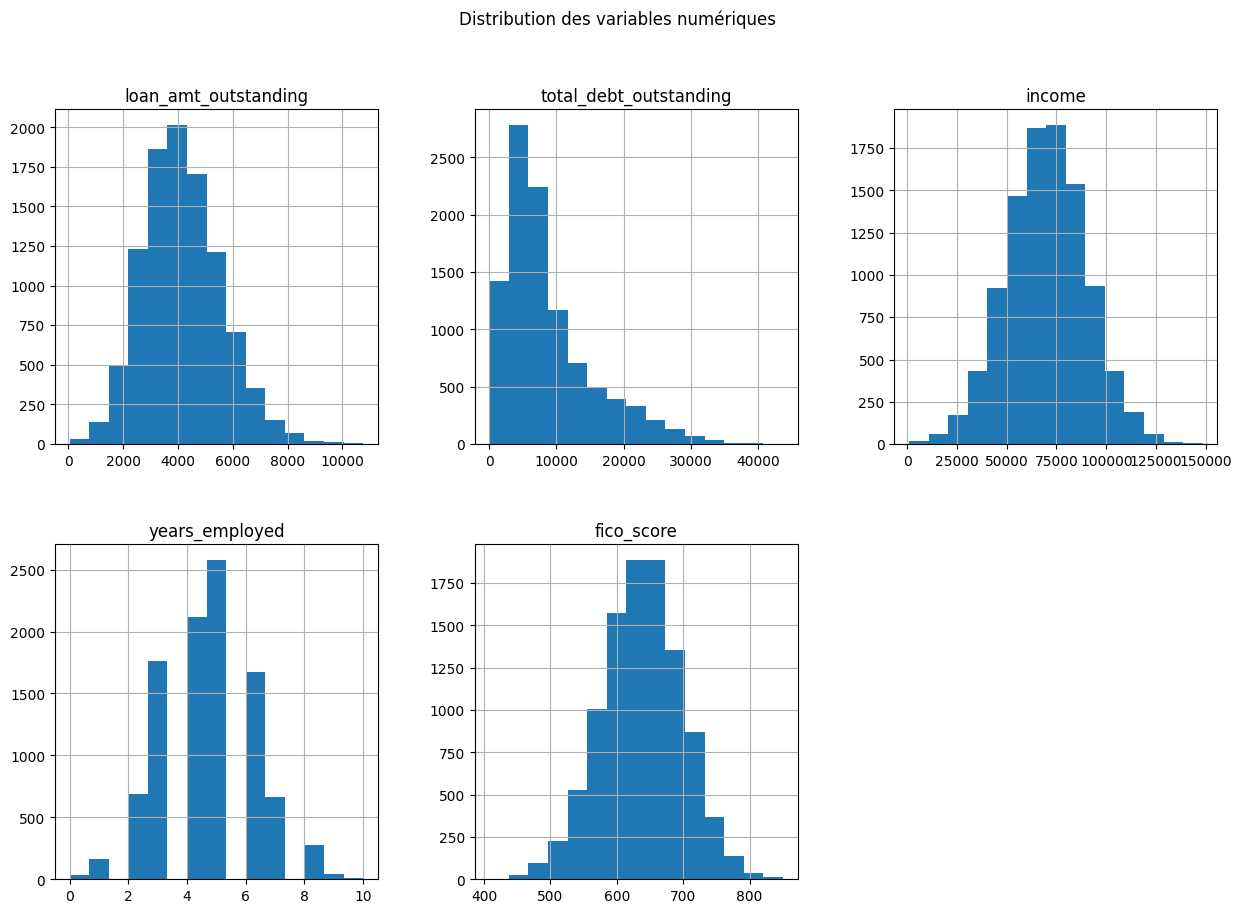

In [12]:
numeric_columns = ['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

data[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Distribution des variables numériques")
plt.show()

## Création d'un boxplot

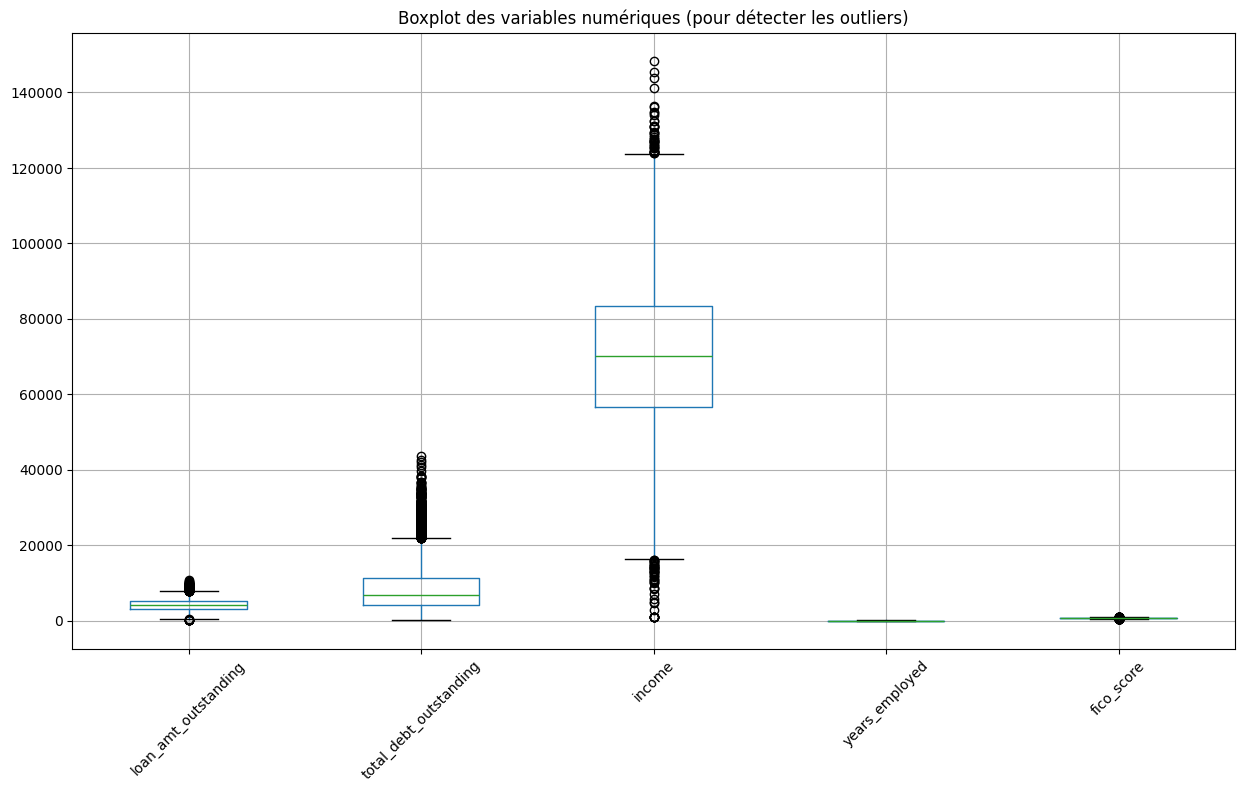

In [13]:
# Créer un boxplot pour chaque variable numérique
plt.figure(figsize=(15, 8))
data[numeric_columns].boxplot()
plt.title("Boxplot des variables numériques (pour détecter les outliers)")
plt.xticks(rotation=45)
plt.show()

## Création d'un diagramme en barre

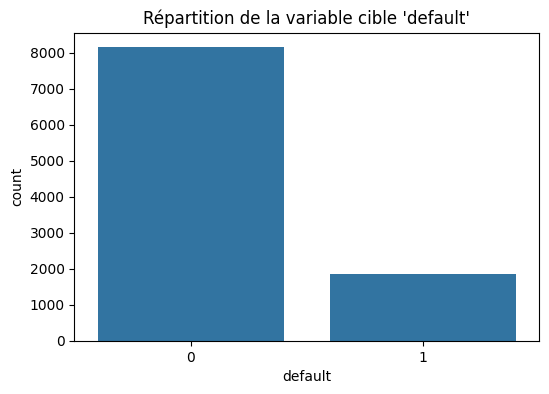

In [14]:
# Créer un diagramme en barres pour la variable 'default'
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=data)
plt.title("Répartition de la variable cible 'default'")
plt.show()

## Création d'un pairplot

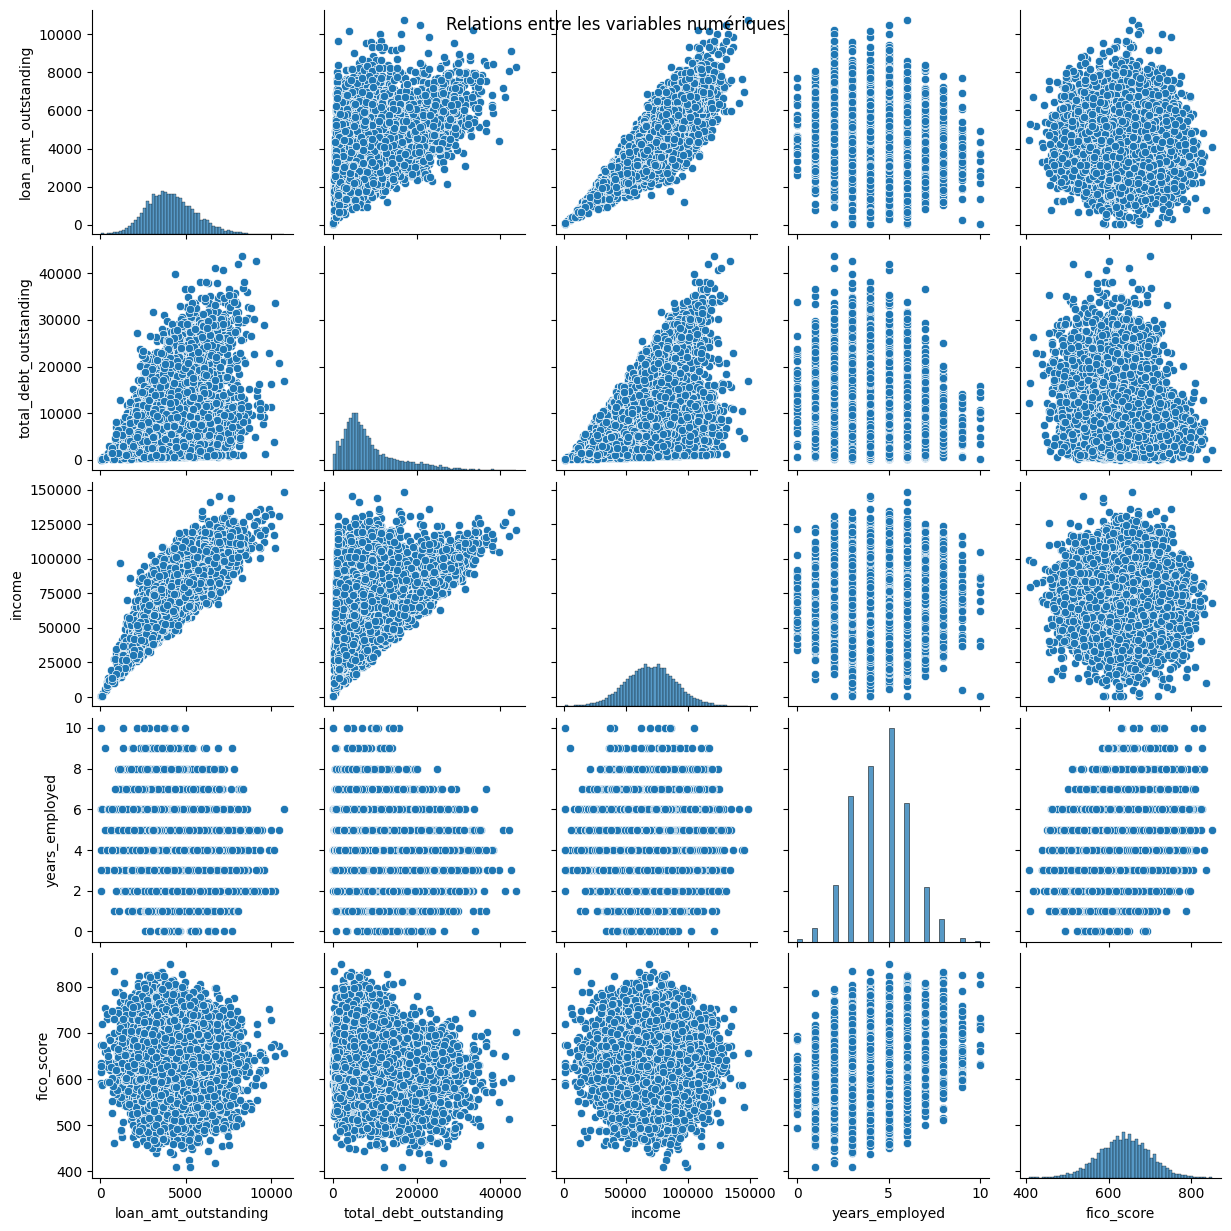

In [15]:
sns.pairplot(data[numeric_columns])
plt.suptitle("Relations entre les variables numériques")
plt.show()

# Evaluation du modèle

In [16]:

# Fonction pour évaluer les performances du modèle
from sklearn.pipeline import FunctionTransformer, make_pipeline


def eval_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    return accuracy, f1, roc_auc

# Fonction pour gérer les outliers en limitant les valeurs à un certain seuil (1% et 99%)
def cap_outliers(X, lower_quantile=0.01, upper_quantile=0.99):
    X_capped = X.copy()
    for column in X_capped.columns:
        lower_bound = X_capped[column].quantile(lower_quantile)
        upper_bound = X_capped[column].quantile(upper_quantile)
        X_capped[column] = np.clip(X_capped[column], lower_bound, upper_bound)
    return X_capped

# Transformer pour gérer les outliers
cap_outliers_transformer = FunctionTransformer(cap_outliers)

# Fonction pour construire le pipeline avec Random Forest
def build_pipeline_random_forest(algo_ml, handle_outliers=True,num_vars=['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']):
    """
    Construire un pipeline pour Random Forest avec gestion optionnelle des outliers.
    
    Parameters:
        algo_ml: Le modèle de machine learning (ici, Random Forest).
        handle_outliers: Boolean, indiquer si la gestion des outliers doit être appliquée.
    """
    if handle_outliers:
        numeric_transformer = make_pipeline(cap_outliers_transformer)  # Gestion des outliers
    else:
        numeric_transformer = make_pipeline()  # Pas de traitement d'outliers

    # Combinaison des transformations dans un ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, num_vars)  # Colonnes numériques sans la variable cible
        ]
    )
    
    # Pipeline final sans SMOTE
    model = Pipeline(steps=[('preprocessing', preprocessor),
                            ('regressor', algo_ml)])
  
    return model


In [17]:

# Définir les colonnes numériques

# Préparer les données (X : features, y : target)
mlflow.set_experiment("Random_Forest_Experiment")


# Définir les colonnes numériques sans la colonne 'default'
num_vars = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

# Séparer les données : X sans la colonne 'default', y est la colonne 'default'
X = X_data  # Tes données sans la colonne 'default'
y = y_data  # La colonne 'default' est la variable cible

# Diviser les données en entraînement, validation et test
seed = 4321
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

# Convertir les colonnes entières en float64 si elles peuvent contenir des valeurs manquantes
X_train = X_train.astype({col: 'float64' for col in X_train.select_dtypes(include='int').columns})
X_test = X_test.astype({col: 'float64' for col in X_test.select_dtypes(include='int').columns})
# Appliquer SMOTE pour équilibrer les classes avant d'entraîner le modèle
smote = SMOTE(sampling_strategy='auto', random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Activation du suivi automatique pour Sklearn avec MLflow
mlflow.sklearn.autolog()


# Configuration des différents runs avec ou sans SMOTE et avec ou sans gestion des outliers
runs = [
    {"n_estimators": 200, "max_depth": 15, "min_samples_split": 5, "max_features": 'sqrt', "run_name": "rf_200_trees_depth_15_split_5", "use_smote": True, "handle_outliers": True},
    {"n_estimators": 300, "max_depth": 20, "min_samples_split": 5, "max_features": 'log2', "run_name": "rf_300_trees_depth_20_split_5", "use_smote": True, "handle_outliers": True},
    {"n_estimators": 250, "max_depth": 18, "min_samples_split": 2, "max_features": 'sqrt', "run_name": "rf_250_trees_depth_18_split_2", "use_smote": True, "handle_outliers": True},
    {"n_estimators": 200, "max_depth": 15, "min_samples_split": 5, "max_features": 'sqrt', "run_name": "rf_no_smote_no_outliers", "use_smote": False, "handle_outliers": False},  # Sans SMOTE et sans outliers
]

# Boucle pour entraîner différents modèles avec des hyperparamètres optimisés
for run in runs:
    with mlflow.start_run(run_name=run["run_name"]):
        
        # Construire le pipeline avec Random Forest et les hyperparamètres spécifiques
        model = build_pipeline_random_forest(
            algo_ml=RandomForestClassifier(
                random_state=seed, 
                n_estimators=run["n_estimators"], 
                max_depth=run["max_depth"], 
                min_samples_split=run["min_samples_split"], 
                max_features=run["max_features"],  # Correction du paramètre ici
                class_weight="balanced"  # Gestion du déséquilibre des classes dans le modèle
            )
        )
        
        # Entraîner le pipeline modèle sur les données après SMOTE
        model.fit(X_train_smote, y_train_smote)
        
        # Prédictions sur les données d'entraînement
        train_preds = model.predict(X_train_smote)
        
        # Métriques de performances sur les données d'entraînement
        train_accuracy, train_f1, train_roc_auc = eval_metrics(y_train_smote, train_preds)
        
        # Prédictions sur les données de validation
        val_preds = model.predict(X_val)
        
        # Métriques de performances sur les données de validation
        val_accuracy, val_f1, val_roc_auc = eval_metrics(y_val, val_preds)
        
        # Enregistrement des métriques dans MLflow
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("train_f1", train_f1)
        mlflow.log_metric("train_roc_auc", train_roc_auc)
        mlflow.log_metric("val_accuracy", val_accuracy)
        mlflow.log_metric("val_f1", val_f1)
        mlflow.log_metric("val_roc_auc", val_roc_auc)
        
        # Sauvegarder le modèle dans MLflow
        mlflow.sklearn.log_model(model, run["run_name"])
        
        # Afficher les résultats pour chaque run
        print(f"Accuracy on Train Data ({run['run_name']}):", train_accuracy)
        print(f"Accuracy on Validation Data ({run['run_name']}):", val_accuracy)
        print(f"F1 Score on Train Data ({run['run_name']}):", train_f1)
        print(f"F1 Score on Validation Data ({run['run_name']}):", val_f1)
        print(f"ROC AUC on Train Data ({run['run_name']}):", train_roc_auc)
        print(f"ROC AUC on Validation Data ({run['run_name']}):", val_roc_auc)
        print("Model run ID: ", mlflow.active_run().info.run_id)
        
# Fin de la session MLflow
mlflow.end_run()

2024/09/08 20:23:44 INFO mlflow.tracking.fluent: Experiment with name 'Random_Forest_Experiment' does not exist. Creating a new experiment.


2024/09/08 20:24:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/08 20:24:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` 

Accuracy on Train Data (rf_200_trees_depth_15_split_5): 1.0
Accuracy on Validation Data (rf_200_trees_depth_15_split_5): 0.9945
F1 Score on Train Data (rf_200_trees_depth_15_split_5): 1.0
F1 Score on Validation Data (rf_200_trees_depth_15_split_5): 0.986232790988736
ROC AUC on Train Data (rf_200_trees_depth_15_split_5): 1.0
ROC AUC on Validation Data (rf_200_trees_depth_15_split_5): 0.9909374999999999
Model run ID:  4e48513245094b799ffc3fb7e7f394b1


2024/09/08 20:24:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/08 20:24:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` 

Accuracy on Train Data (rf_300_trees_depth_20_split_5): 1.0
Accuracy on Validation Data (rf_300_trees_depth_20_split_5): 0.9945
F1 Score on Train Data (rf_300_trees_depth_20_split_5): 1.0
F1 Score on Validation Data (rf_300_trees_depth_20_split_5): 0.986232790988736
ROC AUC on Train Data (rf_300_trees_depth_20_split_5): 1.0
ROC AUC on Validation Data (rf_300_trees_depth_20_split_5): 0.9909374999999999
Model run ID:  219a6d22b6fb43d0a4d540c5c80ade1e


2024/09/08 20:24:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/08 20:24:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` 

Accuracy on Train Data (rf_250_trees_depth_18_split_2): 1.0
Accuracy on Validation Data (rf_250_trees_depth_18_split_2): 0.994
F1 Score on Train Data (rf_250_trees_depth_18_split_2): 1.0
F1 Score on Validation Data (rf_250_trees_depth_18_split_2): 0.9849246231155779
ROC AUC on Train Data (rf_250_trees_depth_18_split_2): 1.0
ROC AUC on Validation Data (rf_250_trees_depth_18_split_2): 0.9887500000000001
Model run ID:  4c07f58f2913417f80842ea746066051


2024/09/08 20:24:42 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/08 20:24:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` 

Accuracy on Train Data (rf_no_smote_no_outliers): 1.0
Accuracy on Validation Data (rf_no_smote_no_outliers): 0.9945
F1 Score on Train Data (rf_no_smote_no_outliers): 1.0
F1 Score on Validation Data (rf_no_smote_no_outliers): 0.986232790988736
ROC AUC on Train Data (rf_no_smote_no_outliers): 1.0
ROC AUC on Validation Data (rf_no_smote_no_outliers): 0.9909374999999999
Model run ID:  b570151315a6495abbbe308478845b3e


In [18]:
# Nombre de lignes dans X_train, X_test et X_train_smote
print("Nombre de lignes dans X_train :", X_train.shape[0])
print("Nombre de lignes dans X_test :", X_test.shape[0])
print("Nombre de lignes dans X_train_smote :", X_train_smote.shape[0])


Nombre de lignes dans X_train : 6000
Nombre de lignes dans X_test : 2000
Nombre de lignes dans X_train_smote : 9820


In [19]:
print("Nombre de lignes dans X_train :", X_data.shape[0])


Nombre de lignes dans X_train : 10000


In [20]:
# 1. Statistiques descriptives avant cap_outliers
print("Statistiques descriptives avant cap_outliers:")
print(X_train.describe())

# 2. Appliquer la fonction cap_outliers
X_train_capped = cap_outliers(X_train)

# 3. Statistiques descriptives après cap_outliers
print("\nStatistiques descriptives après cap_outliers:")
print(X_train_capped.describe())

Statistiques descriptives avant cap_outliers:
        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  6.000000e+03               6000.000000           6000.000000   
mean   4.970295e+06                  1.459167           4173.157827   
std    2.293061e+06                  1.732195           1417.267141   
min    1.001679e+06                  0.000000             46.783973   
25%    2.957810e+06                  0.000000           3173.989520   
50%    4.998448e+06                  1.000000           4057.496504   
75%    6.950872e+06                  2.000000           5064.785863   
max    8.999218e+06                  5.000000          10210.746690   

       total_debt_outstanding         income  years_employed   fico_score  
count             6000.000000    6000.000000     6000.000000  6000.000000  
mean              8746.048123   70203.992472        4.564500   638.476000  
std               6603.498873   19833.596913        1.561061    60.389375  
min       

In [22]:
!mlflow server --host 127.0.0.1 --port 8081

^C


In [23]:
# Définir le nom de l'expérience dans MLflow
mlflow.set_experiment("Logistic_Regression_Experiment")

# Préparer les données (X : features, y : target)
num_vars = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
X = X_data  # Less données sans la colonne 'default'
y = y_data  # La colonne 'default' est la variable cible

# Diviser les données en entraînement, validation et test
seed = 4321
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=seed)

# Convertir les colonnes entières en float64 si elles peuvent contenir des valeurs manquantes
X_train = X_train.astype({col: 'float64' for col in X_train.select_dtypes(include='int').columns})
X_test = X_test.astype({col: 'float64' for col in X_test.select_dtypes(include='int').columns})

# Appliquer SMOTE pour équilibrer les classes avant d'entraîner le modèle
smote = SMOTE(sampling_strategy='auto', random_state=seed)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Activation du suivi automatique pour Sklearn avec MLflow
mlflow.sklearn.autolog()

# Configuration des runs pour Logistic Regression
logistic_runs = [
    {"C": 1.0, "max_iter": 100, "run_name": "logreg_default", "use_smote": True, "handle_outliers": True},
    {"C": 0.5, "max_iter": 200, "run_name": "logreg_C_0.5_iter_200", "use_smote": True, "handle_outliers": False},
    {"C": 1.0, "max_iter": 100, "run_name": "logreg_no_smote_no_outliers", "use_smote": False, "handle_outliers": False},
]

# Boucle pour entraîner différents modèles avec Logistic Regression
for run in logistic_runs:
    with mlflow.start_run(run_name=run["run_name"]):
        
        # Appliquer SMOTE uniquement si use_smote est True
        if run["use_smote"]:
            smote = SMOTE(sampling_strategy='auto', random_state=seed)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            print(f"SMOTE applied for {run['run_name']}.")
        else:
            X_train_resampled, y_train_resampled = X_train, y_train
            print(f"SMOTE not applied for {run['run_name']}.")
        
        # Construire le modèle Logistic Regression
        model = LogisticRegression(
            random_state=seed, 
            C=run["C"], 
            max_iter=run["max_iter"],
            class_weight="balanced"  # Gestion du déséquilibre des classes
        )
        
        # Entraîner le modèle sur les données après SMOTE
        model.fit(X_train_resampled, y_train_resampled)
        
        # Prédictions sur les données d'entraînement
        train_preds = model.predict(X_train_resampled)
        
        # Calcul des métriques sur les données d'entraînement
        train_accuracy, train_f1, train_roc_auc = eval_metrics(y_train_resampled, train_preds)
        
        # Prédictions sur les données de validation
        val_preds = model.predict(X_val)
        
        # Calcul des métriques sur les données de validation
        val_accuracy, val_f1, val_roc_auc = eval_metrics(y_val, val_preds)
        
        # Enregistrement des métriques dans MLflow
        mlflow.log_metric("train_accuracy", train_accuracy)
        mlflow.log_metric("train_f1", train_f1)
        mlflow.log_metric("train_roc_auc", train_roc_auc)
        mlflow.log_metric("val_accuracy", val_accuracy)
        mlflow.log_metric("val_f1", val_f1)
        mlflow.log_metric("val_roc_auc", val_roc_auc)
        
        # Sauvegarder le modèle dans MLflow
        mlflow.sklearn.log_model(model, run["run_name"])
        
        # Afficher les résultats pour chaque run
        print(f"Accuracy on Train Data ({run['run_name']}):", train_accuracy)
        print(f"Accuracy on Validation Data ({run['run_name']}):", val_accuracy)
        print(f"F1 Score on Train Data ({run['run_name']}):", train_f1)
        print(f"F1 Score on Validation Data ({run['run_name']}):", val_f1)
        print(f"ROC AUC on Train Data ({run['run_name']}):", train_roc_auc)
        print(f"ROC AUC on Validation Data ({run['run_name']}):", val_roc_auc)
        print("Model run ID: ", mlflow.active_run().info.run_id)
        
# Fin de la session MLflow
mlflow.end_run()

2024/09/08 21:08:42 INFO mlflow.tracking.fluent: Experiment with name 'Logistic_Regression_Experiment' does not exist. Creating a new experiment.
2024/09/08 21:08:43 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '7e05404ed0a4492a879ba175fef18574', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/09/08 21:08:43 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/09/08 21:08:43 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/09/08 21:08:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/09/08 21:09:00 WARNING mlflow.models.mode

SMOTE applied for logreg_default.


c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/09/08 21:09:28 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement erro

Accuracy on Train Data (logreg_default): 0.9846232179226069
Accuracy on Validation Data (logreg_default): 0.98
F1 Score on Train Data (logreg_default): 0.9846341711610868
F1 Score on Validation Data (logreg_default): 0.9507389162561576
ROC AUC on Train Data (logreg_default): 0.984623217922607
ROC AUC on Validation Data (logreg_default): 0.974375
Model run ID:  da9c16533bfd4e8b89e21591a3109e34


2024/09/08 21:09:50 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/09/08 21:09:50 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/09/08 21:09:50 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/09/08 21:09:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SMOTE applied for logreg_C_0.5_iter_200.


2024/09/08 21:10:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/09/08 21:10:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` 

Accuracy on Train Data (logreg_C_0.5_iter_200): 0.9846232179226069
Accuracy on Validation Data (logreg_C_0.5_iter_200): 0.98
F1 Score on Train Data (logreg_C_0.5_iter_200): 0.9846341711610868
F1 Score on Validation Data (logreg_C_0.5_iter_200): 0.9507389162561576
ROC AUC on Train Data (logreg_C_0.5_iter_200): 0.984623217922607
ROC AUC on Validation Data (logreg_C_0.5_iter_200): 0.974375
Model run ID:  051ad78c42904dbc97678823037bf477
SMOTE not applied for logreg_no_smote_no_outliers.


c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2024/09/08 21:10:19 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\mathi\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement erro

Accuracy on Train Data (logreg_no_smote_no_outliers): 0.9763333333333334
Accuracy on Validation Data (logreg_no_smote_no_outliers): 0.975
F1 Score on Train Data (logreg_no_smote_no_outliers): 0.9377192982456141
F1 Score on Validation Data (logreg_no_smote_no_outliers): 0.9397590361445783
ROC AUC on Train Data (logreg_no_smote_no_outliers): 0.9780451802163718
ROC AUC on Validation Data (logreg_no_smote_no_outliers): 0.9750000000000001
Model run ID:  b06f81b744fc463f9d01eb694dcf6eaf
